In [5]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data")
OUT_DIR = Path("outputs")
OUT_DIR.mkdir(exist_ok=True)

In [6]:
sales = pd.read_csv(DATA_DIR / "Transaction_data.csv", low_memory=False)
store = pd.read_csv(DATA_DIR / "Store_Lookup.csv")
product = pd.read_csv(DATA_DIR / "Product_Lookup.csv")

In [7]:
for df, name in [(sales, "sales"), (store, "store"), (product, "product")]:
    print(f"\n>>> {name.upper()} HEAD")
    display(df.head())
    display(df.info())
    print("-" * 60)


>>> SALES HEAD


,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,14-Jan-09,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
1,14-Jan-09,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0
2,14-Jan-09,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0
3,14-Jan-09,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1
4,14-Jan-09,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524950 entries, 0 to 524949
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   WEEK_END_DATE  524950 non-null  object 
 1   STORE_NUM      524950 non-null  int64  
 2   UPC            524950 non-null  int64  
 3   UNITS          524950 non-null  int64  
 4   VISITS         524950 non-null  int64  
 5   HHS            524950 non-null  int64  
 6   SPEND          524950 non-null  float64
 7   PRICE          524927 non-null  float64
 8   BASE_PRICE     524765 non-null  float64
 9   FEATURE        524950 non-null  int64  
 10  DISPLAY        524950 non-null  int64  
 11  TPR_ONLY       524950 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 48.1+ MB


None

------------------------------------------------------------

>>> STORE HEAD


,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24322


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STORE_ID                 79 non-null     int64  
 1   STORE_NAME               79 non-null     object 
 2   ADDRESS_CITY_NAME        79 non-null     object 
 3   ADDRESS_STATE_PROV_CODE  79 non-null     object 
 4   MSA_CODE                 79 non-null     int64  
 5   SEG_VALUE_NAME           79 non-null     object 
 6   PARKING_SPACE_QTY        27 non-null     float64
 7   SALES_AREA_SIZE_NUM      79 non-null     int64  
 8   AVG_WEEKLY_BASKETS       79 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 5.7+ KB


None

------------------------------------------------------------

>>> PRODUCT HEAD


,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,3500068914,COLG SPEARMINT WISP,COLGATE,ORAL HYGIENE PRODUCTS,MOUTHWASH/RINSES AND SPRAYS,16 CT
4,3700019521,CREST PH WHTG CLN MINT TP,P & G,ORAL HYGIENE PRODUCTS,MOUTHWASH/RINSES AND SPRAYS,4.2 OZ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UPC           58 non-null     int64 
 1   DESCRIPTION   58 non-null     object
 2   MANUFACTURER  58 non-null     object
 3   CATEGORY      58 non-null     object
 4   SUB_CATEGORY  58 non-null     object
 5   PRODUCT_SIZE  58 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


None

------------------------------------------------------------


In [8]:
sales.columns   = sales.columns.str.lower()
store.columns   = store.columns.str.lower()
product.columns = product.columns.str.lower()

sales["store_num"] = sales["store_num"].astype(str)
sales["upc"]       = sales["upc"].astype(str)
store["store_id"]  = store["store_id"].astype(str)
product["upc"]     = product["upc"].astype(str)


In [9]:
sales["week_end_date"] = pd.to_datetime(sales["week_end_date"], format="%d-%b-%y", errors="coerce")

## CLEANING

In [10]:
def count_zeros_nulls(df, cols):
    return pd.DataFrame({
        "zeros": [(df[c] == 0).sum() for c in cols],
        "nulls": [df[c].isna().sum() for c in cols]
    }, index=cols)


In [11]:
cols_qc = ["units", "spend", "price", "base_price"]
count_zeros_nulls(sales, cols_qc)


,zeros,nulls
units,5,0
spend,24,0
price,1,23
base_price,0,185


Data Cleaning Plan for Units = 0

if units = 0 & hhs = visits , then units = visits

if units = 0 & hhs < visits, then units = visits

if units = 0 & hhs > visit, then units = hhs

In [12]:
mask_u0 = sales["units"] == 0
sales.loc[mask_u0 & (sales["hhs"] == sales["visits"]), "units"] = sales["visits"]
sales.loc[mask_u0 & (sales["hhs"] <  sales["visits"]), "units"] = sales["visits"]
sales.loc[mask_u0 & (sales["hhs"] >  sales["visits"]), "units"] = sales["hhs"]


Filling missing/ 0 base_price:

if tpr = 1, check the upc and median the baseprice

if tpr = 0 , then base price = spend/units

In [13]:
# Fill using spend/units when TPR = 0
mask_base_invalid = sales["base_price"].isna() | (sales["base_price"] == 0)
sales.loc[mask_base_invalid & (sales["tpr_only"] == 0), "base_price"] = (sales["spend"] / sales["units"])

# when base_price is still NaN or 0 and TPR =1
median_base = sales.groupby("upc")["base_price"].median()
mask_base_still = sales["base_price"].isna() | (sales["base_price"] == 0)
sales.loc[mask_base_still, "base_price"] = sales["upc"].map(median_base)


Filling missing/0 price:

if tpr = 1, check the upc and median the baseprice

if tpr = 0 , then price = base price


In [14]:
# Fill price = base_price if TPR = 0
mask_price_invalid = sales["price"].isna() | (sales["price"] == 0)
sales.loc[mask_price_invalid & (sales["tpr_only"] == 0), "price"] = sales["base_price"]

# CASE 2: when TPR = 1
mean_price = sales.groupby("upc")["price"].mean()
mask_price_still = sales["price"].isna() | (sales["price"] == 0)
sales.loc[mask_price_still, "price"] = sales["upc"].map(mean_price)


## FLAGGING OUTLIERS

In [15]:
sales["discount"] = sales["base_price"] - sales["price"]
sales["discount_pct"] = (sales["discount"] / sales["base_price"]).round(3)
sales["units_per_visit"] = sales["units"] / sales["visits"]
sales["visits_per_hhs"] = sales["visits"] / sales["hhs"]


In [16]:
units_per_visit_th = sales["units_per_visit"].quantile(0.95)
visits_per_hhs_th  = sales["visits_per_hhs"].quantile(0.95)

sales["outlier_flag"] = ((sales["units_per_visit"] > units_per_visit_th) | (sales["visits_per_hhs"]  > visits_per_hhs_th))

print(f"Flagged outliers: {sales['outlier_flag'].sum()} / {len(sales)}")


Flagged outliers: 44502 / 524950


In [17]:
sales.to_csv(OUT_DIR / "cleaned_sales.csv", index=False)
sales[sales["outlier_flag"]].to_csv(OUT_DIR / "sales_outliers.csv", index=False)

 # EDA 

In [17]:
sales_prod = sales.merge(product, on="upc", how="left")
full_data = sales_prod.merge(store, left_on="store_num", right_on="store_id", how="left")

In [18]:
print("Total transactions:", len(sales))
print("Date range:", sales['week_end_date'].min(), "to", sales['week_end_date'].max())
print("Total weeks:", sales['week_end_date'].nunique())
print("Unique products (UPC):", sales['upc'].nunique())
print("Unique stores:", sales['store_num'].nunique())

Total transactions: 524950
Date range: 2009-01-14 00:00:00 to 2012-01-04 00:00:00
Total weeks: 156
Unique products (UPC): 55
Unique stores: 77


In [20]:
sales_prod.to_csv(OUT_DIR / "sales&product.csv", index=False)
full_data.to_csv(OUT_DIR / "full_data.csv", index=False)

In [19]:
product_summary = sales.groupby("upc").agg(
    total_units=('units', 'sum'),
    total_spend=('spend', 'sum'),
    avg_price=('price', 'mean'),
    avg_base_price=('base_price', 'mean'),
    avg_discount_pct=('discount_pct', 'mean'),
    count_weeks=('week_end_date', 'nunique')
).reset_index()

product_summary = product_summary.merge(product, on='upc', how='left')
product_summary.sort_values(by="total_spend", ascending=False).head(10)

,upc,total_units,total_spend,avg_price,avg_base_price,avg_discount_pct,count_weeks,description,manufacturer,category,sub_category,product_size
12,1600027527,804228,2048896.22,2.767562,2.921757,0.050724,156,GM HONEY NUT CHEERIOS,GENERAL MI,COLD CEREAL,ALL FAMILY CEREAL,12.25 OZ
32,3800031838,565894,1483799.52,2.886601,3.044370,0.051677,156,KELL FROSTED FLAKES,KELLOGG,COLD CEREAL,KIDS CEREAL,15 OZ
45,7192100339,259558,1437337.39,5.982098,6.554559,0.085082,156,DIGRN PEPP PIZZA,TOMBSTONE,FROZEN PIZZA,PIZZA/PREMIUM,28.3 OZ
13,1600027528,367984,1433001.72,4.270657,4.441841,0.038604,156,GM CHEERIOS,GENERAL MI,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
14,1600027564,517126,1384585.78,2.762911,3.109502,0.108758,156,GM CHEERIOS,GENERAL MI,COLD CEREAL,ALL FAMILY CEREAL,12 OZ
31,3800031829,396439,1216282.24,3.164362,3.273618,0.033782,156,KELL BITE SIZE MINI WHEAT,KELLOGG,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
33,3800039118,458639,1151163.13,2.930515,3.144593,0.067310,156,KELL FROOT LOOPS,KELLOGG,COLD CEREAL,KIDS CEREAL,12.2 OZ
44,7192100337,191481,1055817.38,5.978633,6.555917,0.085776,156,DIGRN SUPREME PIZZA,TOMBSTONE,FROZEN PIZZA,PIZZA/PREMIUM,32.7 OZ
8,1111085350,468195,991368.53,2.135515,2.239244,0.044328,156,PL BT SZ FRSTD SHRD WHT,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
52,88491201426,304234,954418.23,3.192203,3.258395,0.019676,144,POST HNY BN OTS HNY RSTD,POST FOODS,COLD CEREAL,ADULT CEREAL,18 OZ


In [20]:
sales_store = sales.merge(store, left_on="store_num", right_on="store_id", how="left")

store_tier_summary = sales_store.groupby("seg_value_name").agg(
    total_units=('units', 'sum'),
    total_spend=('spend', 'sum'),
    unique_stores=('store_num', pd.Series.nunique)
).reset_index()

store_tier_summary

,seg_value_name,total_units,total_spend,unique_stores
0,MAINSTREAM,5921002,15814325.76,43
1,UPSCALE,2825748,7790323.60,17
2,VALUE,1823254,5090707.00,19


In [21]:
state_tier = (
    sales_store
    .groupby(['address_state_prov_code', 'seg_value_name'])
    .agg(units=('units', 'sum'), spend=('spend', 'sum'))
    .reset_index()
    .sort_values(['address_state_prov_code', 'spend'], ascending=[True, False])
)

state_tier.head(10)

,address_state_prov_code,seg_value_name,units,spend
0,IN,MAINSTREAM,168850,458675.91
1,KY,MAINSTREAM,606742,1553776.75
2,KY,VALUE,74504,207920.39
3,OH,MAINSTREAM,2749477,7220937.14
4,OH,UPSCALE,1699026,4588091.22
5,OH,VALUE,908862,2543237.28
6,TX,MAINSTREAM,2395933,6580935.96
7,TX,UPSCALE,1126722,3202232.38
8,TX,VALUE,839888,2339549.33


In [22]:
promo_summary = sales.groupby("tpr_only").agg(
    total_units=('units', 'sum'),
    total_spend=('spend', 'sum'),
    avg_price=('price', 'mean'),
    visits=('visits', 'sum')
).reset_index()

promo_summary["units_per_visit"] = promo_summary["total_units"] / promo_summary["visits"]
promo_summary

,tpr_only,total_units,total_spend,avg_price,visits,units_per_visit
0,0,9034493,25056587.07,3.494470,7946244,1.136951
1,1,1258875,2871135.51,2.661482,1065756,1.181204


In [23]:
weekly_sales = sales.groupby(["week_end_date"])[["units", "spend"]].sum().reset_index()
weekly_sales.head()

,week_end_date,units,spend
0,2009-01-14,68681,186584.29
1,2009-01-21,62750,163777.81
2,2009-01-28,56099,147559.96
3,2009-02-04,59495,160947.05
4,2009-02-11,92694,207625.82


In [ ]:
weekly_sales.to_csv(OUT_DIR / "weekly_sales.csv", index=False)

In [24]:
# Filter UPCs with at least 20 observations and non-zero price variation
product_counts = sales.groupby("upc").agg(
    obs_count=('price', 'count'),
    price_std=('price', 'std'),
    unit_std=('units', 'std')
).reset_index()

eligible_upcs = product_counts.query("obs_count >= 20 and price_std > 0 and unit_std > 0")["upc"].tolist()
print("Eligible UPCs for elasticity analysis:", len(eligible_upcs))


Eligible UPCs for elasticity analysis: 55


In [25]:
import numpy as np
import statsmodels.api as sm

def estimate_elasticity(df, upc):
    subset = df[df["upc"] == upc].copy()

    # Log transform
    subset["log_price"] = np.log(subset["price"])
    subset["log_units"] = np.log(subset["units"])

    # Fit linear model
    X = sm.add_constant(subset["log_price"])
    y = subset["log_units"]
    model = sm.OLS(y, X).fit()

    elasticity = model.params["log_price"]
    r_squared = model.rsquared
    return {"upc": upc, "elasticity": elasticity, "r_squared": r_squared}


In [26]:
elasticity_results = [estimate_elasticity(sales, upc) for upc in eligible_upcs]
elasticity_df = pd.DataFrame(elasticity_results)

# Merge with product info
elasticity_df = elasticity_df.merge(product[["upc", "description", "manufacturer", "category"]], on="upc", how="left")

# Sort by elasticity (most sensitive first)
elasticity_df.sort_values(by="elasticity").head(10)


,upc,elasticity,r_squared,description,manufacturer,category
33,3800039118,-4.403441,0.531387,KELL FROOT LOOPS,KELLOGG,COLD CEREAL
43,7192100336,-4.036441,0.438758,DIGIORNO THREE MEAT,TOMBSTONE,FROZEN PIZZA
47,7218063979,-4.022176,0.439915,FRSC PEPPERONI PIZZA,TONYS,FROZEN PIZZA
46,7218063052,-3.823466,0.404374,FRSC BRCK OVN ITL PEP PZ,TONYS,FROZEN PIZZA
23,3000006610,-3.743867,0.287586,QKER CAP N CRUNCH,QUAKER,COLD CEREAL
44,7192100337,-3.566562,0.383968,DIGRN SUPREME PIZZA,TOMBSTONE,FROZEN PIZZA
48,7218063983,-3.344457,0.346999,FRSC 4 CHEESE PIZZA,TONYS,FROZEN PIZZA
45,7192100339,-3.309292,0.329605,DIGRN PEPP PIZZA,TOMBSTONE,FROZEN PIZZA
22,3000006560,-3.202223,0.264857,QKER CAP N CRUNCH BERRIES,QUAKER,COLD CEREAL
17,2066200532,-3.119132,0.134508,NWMN OWN SUPREME PIZZA,KING,FROZEN PIZZA


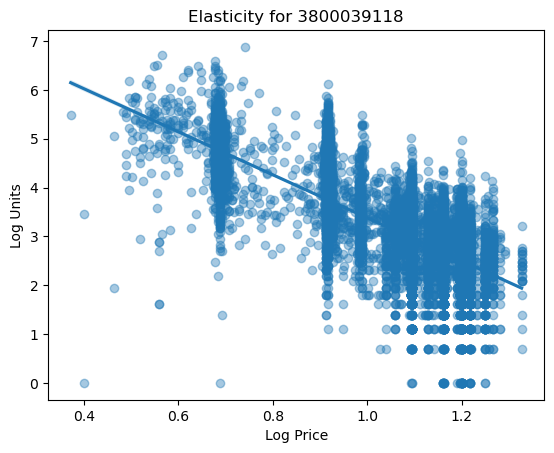

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_upc = elasticity_df.sort_values("elasticity").iloc[0]["upc"]
sample_data = sales[sales["upc"] == sample_upc].copy()

sample_data["log_price"] = np.log(sample_data["price"])
sample_data["log_units"] = np.log(sample_data["units"])

sns.regplot(x="log_price", y="log_units", data=sample_data, scatter_kws={"alpha": 0.4})
plt.title(f"Elasticity for {sample_data['upc'].iloc[0]}")
plt.xlabel("Log Price")
plt.ylabel("Log Units")
plt.show()


In [39]:
elasticity_df.to_csv("outputs/elasticity_by_upc.csv", index=False)

In [71]:
import numpy as np
import statsmodels.api as sm

def estimate_elasticity_enhanced(df, upc):
    subset = df[df["upc"] == upc].copy()

    # Filter out invalid rows
    subset = subset[(subset["units"] > 0) & (subset["price"] > 0)]

    if len(subset) < 20:
        return None  # skip under-sampled UPCs

    # Log transform
    subset["log_units"] = np.log(subset["units"])
    subset["log_price"] = np.log(subset["price"])

    # Features
    X = subset[["log_price", "display", "feature", "tpr_only"]]
    X = sm.add_constant(X)
    y = subset["log_units"]

    model = sm.OLS(y, X).fit()

    return {
        "upc": upc,
        "elasticity": model.params["log_price"],
        "promo_display": model.params.get("display", np.nan),
        "promo_feature": model.params.get("feature", np.nan),
        "promo_tpr": model.params.get("tpr_only", np.nan),
        "r_squared": model.rsquared,
        "n_obs": len(subset)
    }


In [72]:
results = [estimate_elasticity_enhanced(sales, upc) for upc in eligible_upcs]
results = [r for r in results if r is not None]

elasticity_df = pd.DataFrame(results)

# Add product info
elasticity_df = elasticity_df.merge(
    product[["upc", "description", "manufacturer", "category"]],
    on="upc",
    how="left"
)

elasticity_df.to_csv("outputs/elasticity_enhanced.csv", index=False)
elasticity_df.sort_values("elasticity").head(10)


,upc,elasticity,promo_display,promo_feature,promo_tpr,r_squared,n_obs,description,manufacturer,category
47,7218063979,-3.648648,0.497817,-0.014507,-0.486053,0.486085,9755,FRSC PEPPERONI PIZZA,TONYS,FROZEN PIZZA
46,7218063052,-3.353115,0.482317,0.027865,-0.315435,0.439563,10404,FRSC BRCK OVN ITL PEP PZ,TONYS,FROZEN PIZZA
22,3000006560,-3.161527,0.399886,-0.008509,-0.492356,0.317625,10173,QKER CAP N CRUNCH BERRIES,QUAKER,COLD CEREAL
48,7218063983,-3.117906,0.477893,-0.084676,-0.403764,0.385496,8711,FRSC 4 CHEESE PIZZA,TONYS,FROZEN PIZZA
43,7192100336,-3.066155,0.377916,0.232672,-0.092761,0.485584,11796,DIGIORNO THREE MEAT,TOMBSTONE,FROZEN PIZZA
23,3000006610,-2.944552,0.626365,0.200738,-0.465375,0.378583,10495,QKER CAP N CRUNCH,QUAKER,COLD CEREAL
33,3800039118,-2.869158,0.430473,0.521919,-0.002409,0.576342,11948,KELL FROOT LOOPS,KELLOGG,COLD CEREAL
42,7110410471,-2.843402,0.677296,0.000000,-0.230086,0.167893,4450,MKSL PRETZEL STICKS,MKSL,BAG SNACKS
16,2066200531,-2.721890,0.150149,-0.024759,-0.019955,0.091872,3807,NWMN OWN 4 CHEESE PIZZA,KING,FROZEN PIZZA
15,2066200530,-2.596329,0.531572,-0.237842,-0.031368,0.110316,5107,NWMN OWN PEPPERONI PIZZA,KING,FROZEN PIZZA


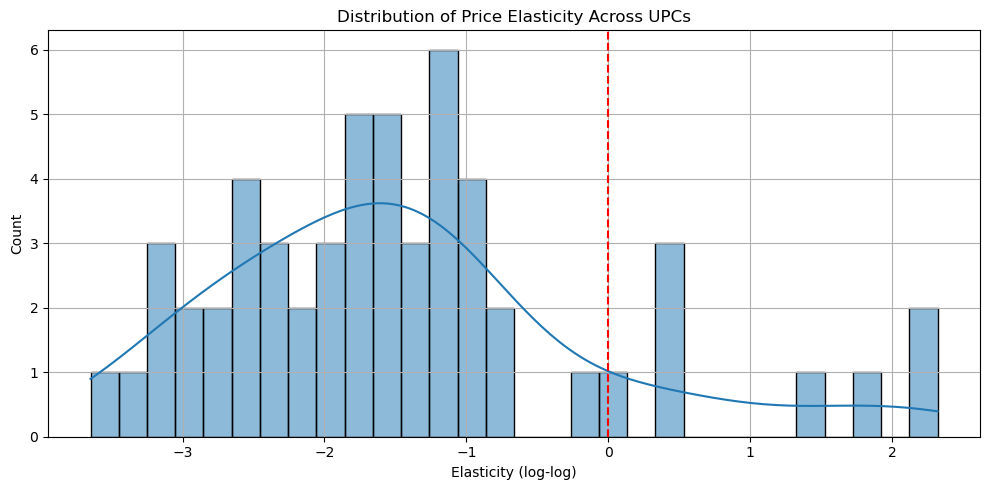

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(elasticity_df["elasticity"], bins=30, kde=True)
plt.title("Distribution of Price Elasticity Across UPCs")
plt.xlabel("Elasticity (log-log)")
plt.axvline(0, color="red", linestyle="--")
plt.grid()
plt.tight_layout()
plt.show()


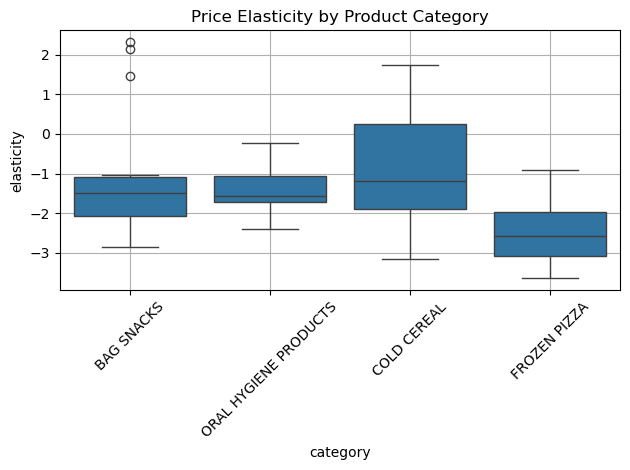

In [74]:
sns.boxplot(data=elasticity_df, x="category", y="elasticity")
plt.xticks(rotation=45)
plt.title("Price Elasticity by Product Category")
plt.tight_layout()
plt.grid()
plt.show()


In [75]:
elasticity_df[[
    "upc", "description", "category", "elasticity",
    "promo_display", "promo_feature", "promo_tpr",
    "r_squared", "n_obs"
]].to_csv("outputs/elasticity_summary_for_dashboard.csv", index=False)


In [76]:
summary = elasticity_df.agg({
    "elasticity": ["mean", "std", "min", "max"],
    "promo_display": ["mean"],
    "promo_feature": ["mean"],
    "promo_tpr": ["mean"],
    "r_squared": ["mean"],
    "n_obs": ["mean"]
}).T

summary.columns = ["mean", "std_dev", "min", "max"][:len(summary.columns)]
summary.round(3)

,mean,std_dev,min,max
elasticity,-1.437,1.341,-3.649,2.321
promo_display,0.441,NaN,NaN,NaN
promo_feature,0.253,NaN,NaN,NaN
promo_tpr,-0.057,NaN,NaN,NaN
r_squared,0.196,NaN,NaN,NaN
n_obs,9544.545,NaN,NaN,NaN


In [77]:
elasticity_df.groupby("category")[["elasticity", "promo_display", "promo_feature", "promo_tpr"]].mean().round(2)


,elasticity,promo_display,promo_feature,promo_tpr
category,,,,
BAG SNACKS,-1.06,0.46,0.16,-0.09
COLD CEREAL,-1.01,0.57,0.48,0.03
FROZEN PIZZA,-2.48,0.53,0.14,-0.10
ORAL HYGIENE PRODUCTS,-1.40,0.19,0.20,-0.08


In [78]:
# Strongly elastic: elasticity < -2
elasticity_df["elasticity_flag"] = pd.cut(
    elasticity_df["elasticity"],
    bins=[-float("inf"), -2, -1, 0, float("inf")],
    labels=["Highly Elastic", "Elastic", "Inelastic", "Positive"]
)

elasticity_df["elasticity_flag"].value_counts()


elasticity_flag
Elastic           23
Highly Elastic    19
Positive           8
Inelastic          5
Name: count, dtype: int64

In [79]:
elasticity_df[["elasticity", "promo_display", "promo_feature", "promo_tpr"]].corr()


,elasticity,promo_display,promo_feature,promo_tpr
elasticity,1.000000,0.232056,0.482568,0.715916
promo_display,0.232056,1.000000,0.256935,0.499487
promo_feature,0.482568,0.256935,1.000000,0.477823
promo_tpr,0.715916,0.499487,0.477823,1.000000


Interpretation:

    High negative correlation between elasticity and promo_feature → price-sensitive products also respond well to promotions
    Near-zero = independent effects

In [80]:
elasticity_df.to_csv("outputs/elasticity_enhanced_flagged.csv", index=False)
